In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import pywt
import os
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level, EpochsArray, concatenate_epochs
from mne.decoding import CSP
from mne.time_frequency import tfr_multitaper, tfr_morlet

from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [6]:
directory = os.fsencode(os.path.abspath(os.getcwd()))
left_rest_scores = []
epochs = []
i = 0
for dr in os.listdir(directory):
    if os.path.isdir(dr) :
        for file in os.listdir(dr):
            if 'ica_epo' in str(file) :
                if i == 0:
                    epochs = read_epochs(str(dr).split("'")[1]+'/'+str(file).split("'")[1])
                    epochs = epochs.interpolate_bads()
                else :
                    new = read_epochs(str(dr).split("'")[1]+'/'+str(file).split("'")[1])
                    new = new.interpolate_bads()
                    epochs = concatenate_epochs([epochs,new])
                i+=1

Reading C:\Users\Alberto\Documents\BCI\data\ah\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
83 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 55 sensor positions
Interpolating 9 sensors
Reading C:\Users\Alberto\Documents\BCI\data\da\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors
Not setting metadata
198 matching events found
No baseline correction applied
Reading C:\Users\Alberto\Document

Interpolating 17 sensors
Not setting metadata
1587 matching events found
No baseline correction applied
Reading C:\Users\Alberto\Documents\BCI\data\ysf\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 7 sensors
Not setting metadata
1687 matching events found
No baseline correction applied


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  13 tasks      | elapsed:   19.2s
[Parallel(n_jobs=5)]: Done  64 out of  64 | elapsed:  1.2min finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


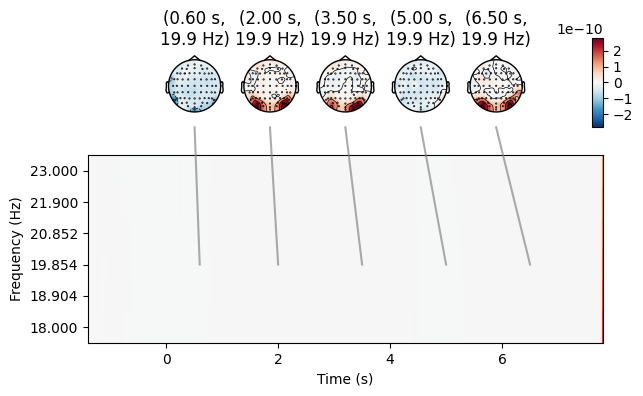

In [15]:
freqs = np.logspace(*np.log10([18, 23]), num=6)
n_cycles = freqs / 2.0  # different number of cycle per frequency
power, itc = tfr_morlet(
    epochs['r_stop', 'r_pinch'],
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=True,
    decim=3,
    n_jobs=5,
)
power.plot_joint(
    baseline=(-1.4,-.4), 
    mode="mean", tmin=-1.4, tmax=7.8, yscale ='log',
    timefreqs=[(.6, 20), (2, 20), (3.5, 20), (5, 20), (6.5, 20)])
print()

Setting up band-pass filter from 10 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1353 samples (1.321 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


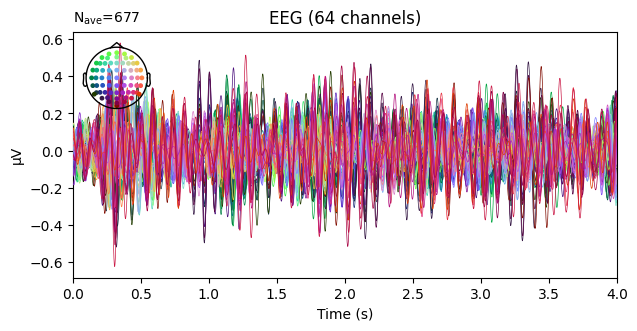

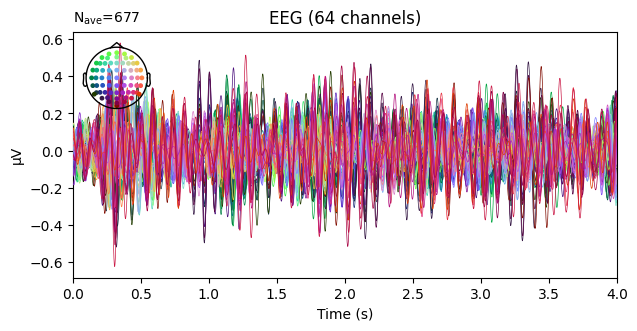

In [9]:
epochs['r_stop','r_pinch'].average().copy().filter(10, 15).crop(0,4).plot()